### **Clustering**


In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
RANDOM_STATE = 42

In [2]:
df = pd.read_csv('../../Data/clean_data/Filtered.csv')
df.head()

,Unnamed: 0,REGION,ZONE,SUB_ZONE,INSTALLATION_KEY,INST_TYPE_CODE,INSTALLATION_TYPE_DESC,METER_SIZE,BILL_ESTIMATE_ACTUAL,BILL_VALID_INVALID,MAIN_SERVICE,SHADOW_SERVICE,WATER_AMOUNT,SEWER_AMOUNT,BILL_AMOUNT,BILL_VOLUME,MONTH,YEAR,NEGATIVE
0,8,WESTLANDS,KITUSURU,WAIYAKI WAY,CV-7000010,DOM,DOMESTIC,0.5,ACTUAL,VALID,WAT,,7771.0,0.0,7771.0,111.0,August,2024.0,False
1,11,KASARANI,HUNTERS -MWIKI,HUNTERS,CV-7000013,DOM,DOMESTIC,0.5,ACTUAL,VALID,WAT,,6424.0,0.0,6424.0,91.0,August,2024.0,False
2,39,WESTLANDS,KITUSURU,WAIYAKI WAY,CV-7000027,DOM,DOMESTIC,0.5,ACTUAL,VALID,WAT,SEW,4904.0,3127.0,8031.0,71.0,August,2024.0,False
3,46,LANGATA,KAREN_LANGATA,OTIENDE LANGATA,CV-7000034,DOM,DOMESTIC,0.5,ACTUAL,VALID,WAT,SEW,4162.0,2716.0,6878.0,62.0,August,2024.0,False
4,56,DAGORETTI,KAWANGWARE,RIARA,CV-7000116,COM,COMMERCIAL,2.0,ACTUAL,VALID,WAT,SEW,61550.0,40458.0,102008.0,785.0,August,2024.0,False


### **Feature Selection**

In [3]:
X = df[["BILL_AMOUNT"]]

# Scale features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
kmeans = KMeans(random_state=42)
clusters = kmeans.fit_predict(X_scaled)

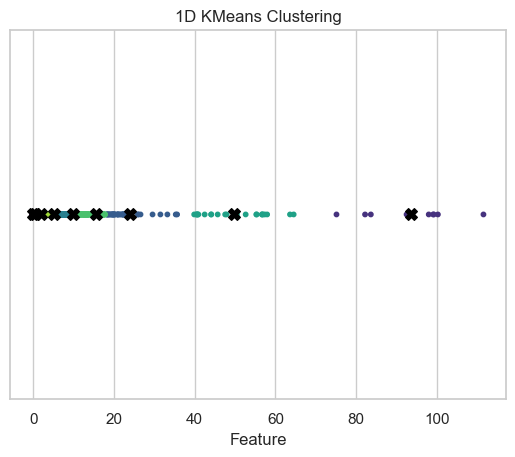

In [9]:
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_

# Plot your data on the x-axis, and just put zeros on y-axis
plt.scatter(X_scaled[:, 0], [0]*len(X_scaled), c=clusters, s=10, cmap='viridis')

# Plot the centers on the same line
plt.scatter(centers[:, 0], [0]*len(centers), c='black', s=70, marker='X')

plt.yticks([])  # hide y-axis ticks
plt.xlabel("Feature")
plt.title("1D KMeans Clustering")
plt.show()


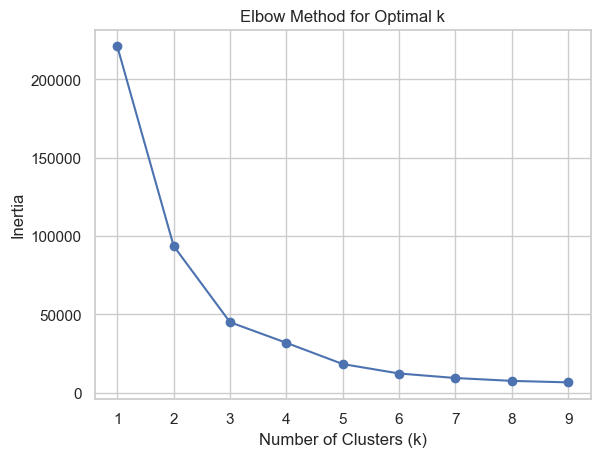

In [ ]:
# Choose the best number of clusters.
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [10]:
# Instantiate KMeans model, using the best n_clusters value as indicated by the plot above
kmeans = KMeans(n_clusters= 3, random_state= 42)

# Fit the model on  scaled data
kmeans.fit(X_scaled)

kmeans

KMeans(n_clusters=3, random_state=42)

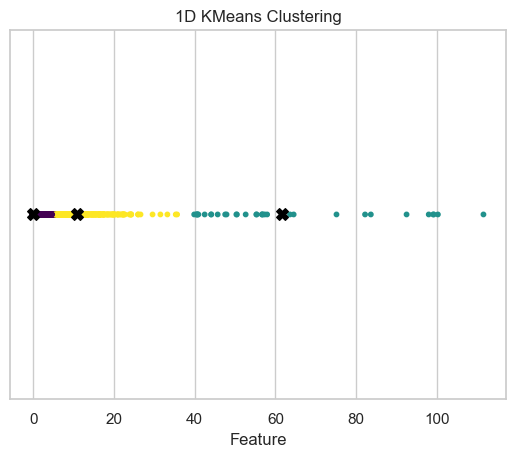

In [13]:
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_

# Plot your data on the x-axis, and just put zeros on y-axis
plt.scatter(X_scaled[:, 0], [0]*len(X_scaled), c=clusters, s=10, cmap='viridis')

# Plot the centers on the same line
plt.scatter(centers[:, 0], [0]*len(centers), c='black', s=70, marker='X')

plt.yticks([])  # hide y-axis ticks
plt.xlabel("Feature")
plt.title("1D KMeans Clustering")
plt.show()

In [18]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score

In [14]:
labels = kmeans.labels_

In [16]:
calinski_harabasz_score(X_scaled, labels)

np.float64(432076.7718642293)

k=2, Calinski-Harabasz Score=300534.11
k=3, Calinski-Harabasz Score=432076.77
k=4, Calinski-Harabasz Score=437241.52
k=5, Calinski-Harabasz Score=611452.53
k=6, Calinski-Harabasz Score=750971.03
k=7, Calinski-Harabasz Score=828827.67
k=8, Calinski-Harabasz Score=889723.54
k=9, Calinski-Harabasz Score=894139.43
k=10, Calinski-Harabasz Score=951814.31


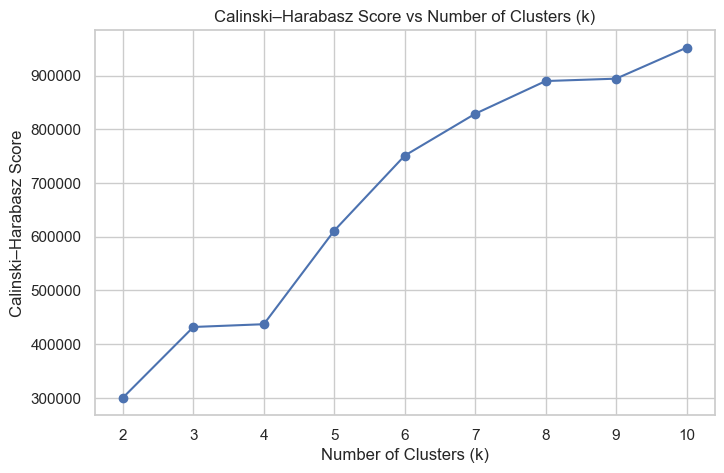

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# Range of cluster numbers to test
k_values = range(2, 11)
scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, clusters)
    scores.append(score)
    print(f"k={k}, Calinski-Harabasz Score={score:.2f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.title("Calinski–Harabasz Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski–Harabasz Score")
plt.grid(True)
plt.show()


In [3]:
# Clustering based on bill amount, water amount, sewer amount and bill volume
X_clusters = df[['BILL_AMOUNT', 'BILL_VOLUME', 'SEWER_AMOUNT', 'WATER_AMOUNT']]

# preview the dataset
X_clusters.head(3)

,BILL_AMOUNT,BILL_VOLUME,SEWER_AMOUNT,WATER_AMOUNT
0,7771.0,111.0,0.0,7771.0
1,6424.0,91.0,0.0,6424.0
2,8031.0,71.0,3127.0,4904.0


In [4]:
# Scale data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_clusters)

In [5]:
# Apply PCA
# Import relevant class
from sklearn.decomposition import PCA

# Create a PCA object
pca_transformer = PCA(n_components= 0.95, random_state= 42)

# Transform data using pca_transformer
pca_data = pca_transformer.fit_transform(X_scaled)
pca_data

array([[-0.2373756 , -0.04582204],
       [-0.25582808, -0.03489988],
       [-0.23980268,  0.01795537],
       ...,
       [-0.17960021,  0.01922132],
       [-0.01244967,  0.03071256],
       [ 0.77485704,  0.09655245]])

In [6]:
kmeans = KMeans(random_state= 42)
labels = kmeans.fit_predict(pca_data)



In [7]:
clusters = kmeans.transform(pca_data)

clusters

array([[1.18217821e-01, 1.78598206e+02, 1.03924207e+01, ...,
        2.35634479e+00, 2.98664372e+01, 4.99668637e+01],
       [1.31447774e-01, 1.78615557e+02, 1.04111933e+01, ...,
        2.37438513e+00, 2.98837729e+01, 4.99882892e+01],
       [1.10144569e-01, 1.78594670e+02, 1.03969278e+01, ...,
        2.35714339e+00, 2.98628704e+01, 5.00035893e+01],
       ...,
       [5.12531012e-02, 1.78534611e+02, 1.03368094e+01, ...,
        2.29693014e+00, 2.98028103e+01, 4.99537884e+01],
       [1.20863659e-01, 1.78367117e+02, 1.01701964e+01, ...,
        2.12967744e+00, 2.96353153e+01, 4.98199973e+01],
       [9.09977809e-01, 1.77577101e+02, 9.38642164e+00, ...,
        1.34325823e+00, 2.88452989e+01, 4.91990986e+01]])

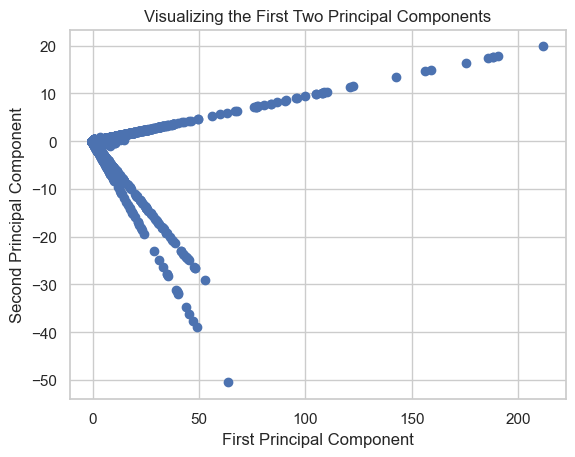

In [8]:

fig, ax = plt.subplots()
ax.scatter(x=pca_data[:, 0], y=pca_data[:, 1])
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_title("Visualizing the First Two Principal Components");

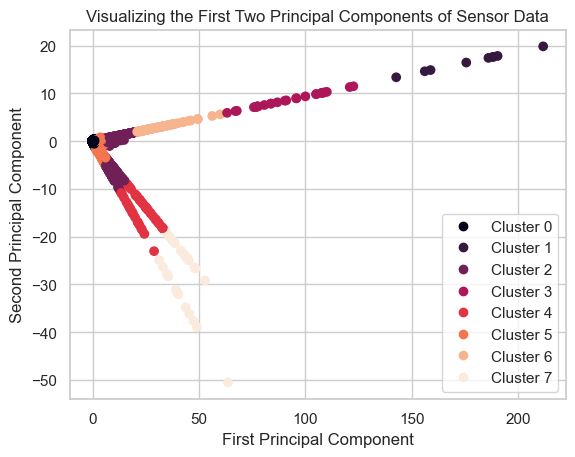

In [9]:
cluster_labels = kmeans.labels_

fig, ax = plt.subplots()

# Modify the below line of code to specify the color:
scatter = ax.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c= cluster_labels)


ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_title("Visualizing the First Two Principal Components of Sensor Data")

ax.legend(*scatter.legend_elements(fmt="Cluster {x:.0f}"));

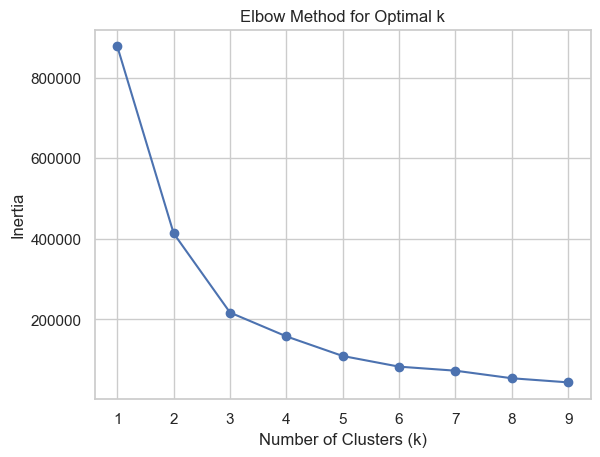

In [10]:
# Choose the best number of clusters.
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [11]:
kmeans = KMeans(n_clusters= 3, random_state= 42)
labels = kmeans.fit_predict(pca_data)


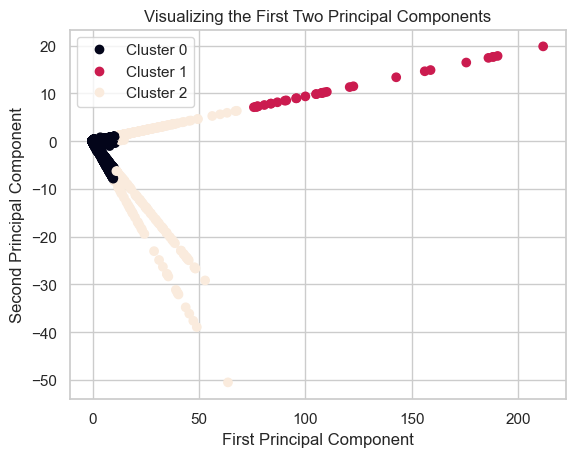

In [12]:
cluster_labels = kmeans.labels_

fig, ax = plt.subplots()

# Modify the below line of code to specify the color:
scatter = ax.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c= cluster_labels)


ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_title("Visualizing the First Two Principal Components")

ax.legend(*scatter.legend_elements(fmt="Cluster {x:.0f}"));

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd

# Range of cluster numbers to test
k_values = range(2, 11)

# Store results
results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Metrics
    ch_score = calinski_harabasz_score(X_scaled, clusters)
    sil_score = silhouette_score(X_scaled, clusters)
    db_score = davies_bouldin_score(X_scaled, clusters)
    
    results.append({
        "k": k,
        "Calinski-Harabasz": ch_score,
        "Silhouette": sil_score,
        "Davies-Bouldin": db_score
    })

# Convert to DataFrame for easier viewing
df_results = pd.DataFrame(results)

# Print results
print(df_results)

# Plot metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(df_results["k"], df_results["Calinski-Harabasz"], marker="o")
axs[0].set_title("Calinski–Harabasz Score")
axs[0].set_xlabel("Number of Clusters (k)")
axs[0].set_ylabel("Score")

axs[1].plot(df_results["k"], df_results["Silhouette"], marker="o")
axs[1].set_title("Silhouette Score")
axs[1].set_xlabel("Number of Clusters (k)")
axs[1].set_ylabel("Score")

axs[2].plot(df_results["k"], df_results["Davies-Bouldin"], marker="o")
axs[2].set_title("Davies–Bouldin Index")
axs[2].set_xlabel("Number of Clusters (k)")
axs[2].set_ylabel("Score (lower is better)")

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [13]:
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to the original dataset
X_clusters['BILL_CLUSTER'] = clusters

# preview the dataset
X_clusters.head()

,BILL_AMOUNT,BILL_VOLUME,SEWER_AMOUNT,WATER_AMOUNT,BILL_CLUSTER
0,7771.0,111.0,0.0,7771.0,0
1,6424.0,91.0,0.0,6424.0,0
2,8031.0,71.0,3127.0,4904.0,0
3,6878.0,62.0,2716.0,4162.0,0
4,102008.0,785.0,40458.0,61550.0,0


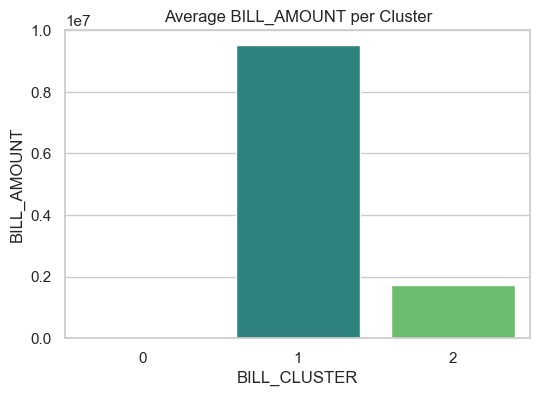

In [14]:
cluster_means = X_clusters.groupby("BILL_CLUSTER")["BILL_AMOUNT"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=cluster_means, x="BILL_CLUSTER", y="BILL_AMOUNT", palette="viridis")
plt.title("Average BILL_AMOUNT per Cluster")
plt.show()

In [15]:
X_clusters.groupby("BILL_CLUSTER")["BILL_AMOUNT"].mean()

BILL_CLUSTER
0    2.230164e+04
1    9.533346e+06
2    1.709700e+06
Name: BILL_AMOUNT, dtype: float64

In [ ]:
cluster_0 = X_clusters[X_clusters['BILL_CLUSTER'] == 0]

sns.histplot(clu)

In [35]:
X_clusters['BILL_CLUSTER'].unique()

array([0, 1, 2], dtype=int32)

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=X_clusters, x="BILL_AMOUNT", hue="BILL_CLUSTER", palette="Set2")
plt.title("Histogram of BILL_AMOUNT by Cluster")
plt.xlabel("Bill Amount")
plt.ylabel("Count")
plt.legend(title="Cluster")
plt.show()

KeyboardInterrupt: 